Tempo de Execução:
   Tamanho  Quicksort (s)  Heapsort (s)  Shellsort (s)
0      500       0.000486      0.001057       0.000521
1     5000       0.007284      0.016161       0.010439
2    10000       0.019005      0.031327       0.018864
3    30000       0.047545      0.099969       0.061186

Número de Comparações:
   Tamanho  Comparações Quicksort  Comparações Heapsort  Comparações Shellsort
0      500                4776.12               7412.62                5790.78
1     5000               70796.36             107290.84               94157.58
2    10000              156004.28             234364.38              210146.22
3    30000              530580.66             796423.22              667014.68

Número de Trocas:
   Tamanho  Trocas Quicksort  Trocas Heapsort  Trocas Shellsort
0      500           2640.02          4018.38           2542.52
1     5000          38359.18         56719.12          41655.62
2    10000          83981.20        123334.62          95057.98
3    30000  

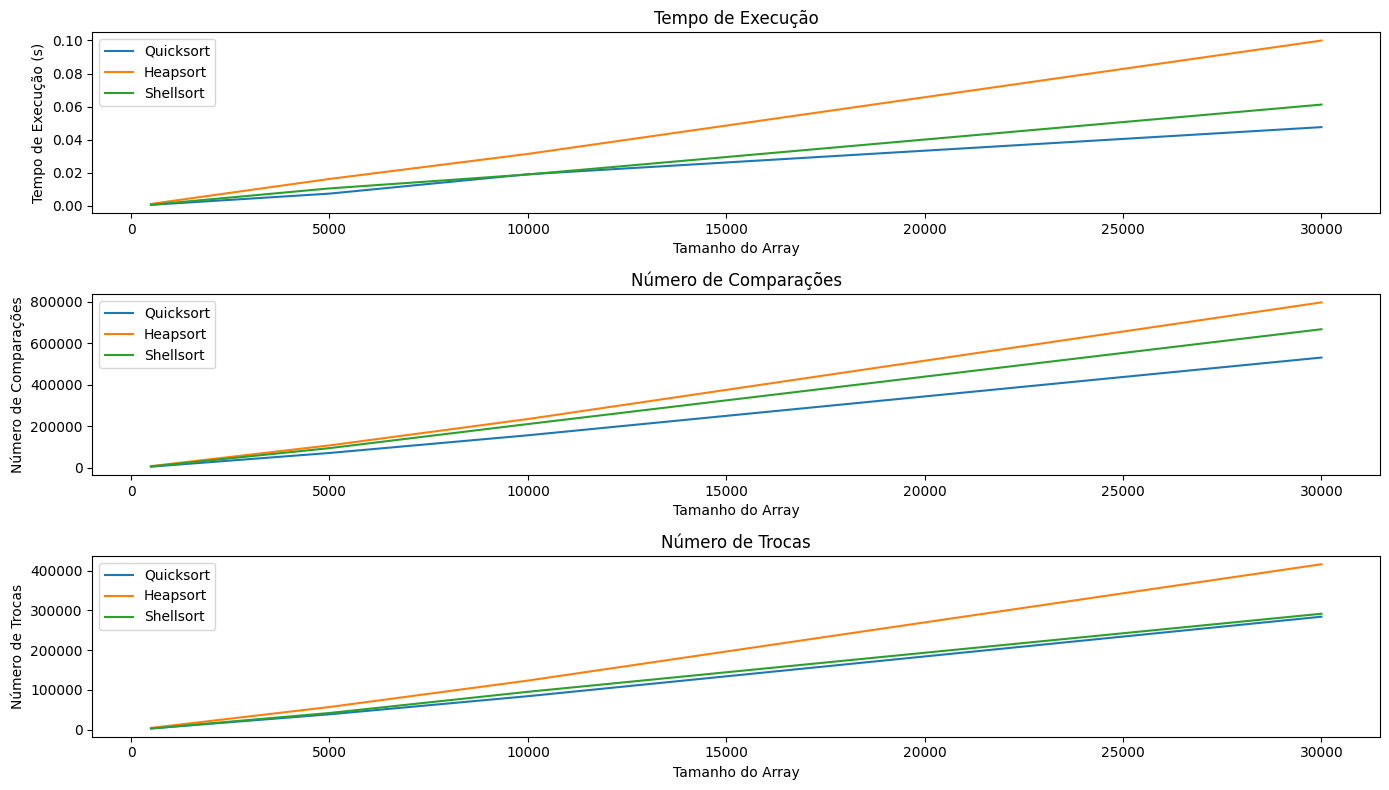

In [25]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def quicksort(arr):
    comparisons = 0
    swaps = 0

    def partition(low, high):
        nonlocal comparisons, swaps
        pivot = arr[high]
        i = low - 1
        for j in range(low, high):
            comparisons += 1
            if arr[j] < pivot:
                i += 1
                arr[i], arr[j] = arr[i], arr[j]
                swaps += 1
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        swaps += 1
        return i + 1

    def quicksort_recursive(low, high):
        if low < high:
            pi = partition(low, high)
            quicksort_recursive(low, pi - 1)
            quicksort_recursive(pi + 1, high)

    quicksort_recursive(0, len(arr) - 1)
    return comparisons, swaps

def heapsort(arr):
    comparisons = 0
    swaps = 0

    def heapify(n, i):
        nonlocal comparisons, swaps
        largest = i
        l = 2 * i + 1
        r = 2 * i + 2

        if l < n:
            comparisons += 1
            if arr[l] > arr[largest]:
                largest = l

        if r < n:
            comparisons += 1
            if arr[r] > arr[largest]:
                largest = r

        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            swaps += 1
            heapify(n, largest)

    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        swaps += 1
        heapify(i, 0)

    return comparisons, swaps

def shellsort(arr):
    comparisons = 0
    swaps = 0
    n = len(arr)
    gap = n // 2
    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap:
                comparisons += 1
                if arr[j - gap] > temp:
                    arr[j] = arr[j - gap]
                    swaps += 1
                    j -= gap
                else:
                    break
            arr[j] = temp
        gap //= 2
    return comparisons, swaps

def test_sorting_algorithms():
    sizes = [500, 5000, 10000, 30000]
    algorithms = {
        "Quicksort": quicksort,
        "Heapsort": heapsort,
        "Shellsort": shellsort
    }
    
    num_runs = 50  # Número de execuções para calcular a média

    times_quicksort = []
    times_heapsort = []
    times_shellsort = []
    comparisons_quicksort = []
    comparisons_heapsort = []
    comparisons_shellsort = []
    swaps_quicksort = []
    swaps_heapsort = []
    swaps_shellsort = []

    for size in sizes:
        for name, algorithm in algorithms.items():
            total_time = 0
            total_comparisons = 0
            total_swaps = 0
            for _ in range(num_runs):
                arr = [random.randint(0, 100) for _ in range(size)]
                start_time = time.time()
                comparisons, swaps = algorithm(arr.copy())
                end_time = time.time()

                total_time += end_time - start_time
                total_comparisons += comparisons
                total_swaps += swaps

            avg_time = total_time / num_runs
            avg_comparisons = total_comparisons / num_runs
            avg_swaps = total_swaps / num_runs

            if name == "Quicksort":
                times_quicksort.append(avg_time)
                comparisons_quicksort.append(avg_comparisons)
                swaps_quicksort.append(avg_swaps)
            elif name == "Heapsort":
                times_heapsort.append(avg_time)
                comparisons_heapsort.append(avg_comparisons)
                swaps_heapsort.append(avg_swaps)
            else:
                times_shellsort.append(avg_time)
                comparisons_shellsort.append(avg_comparisons)
                swaps_shellsort.append(avg_swaps)
    
    # Cria tabelas comparativas
    df_times = pd.DataFrame({
        "Tamanho": sizes,
        "Quicksort (s)": times_quicksort,
        "Heapsort (s)": times_heapsort,
        "Shellsort (s)": times_shellsort
    })
    
    df_comparisons = pd.DataFrame({
        "Tamanho": sizes,
        "Comparações Quicksort": comparisons_quicksort,
        "Comparações Heapsort": comparisons_heapsort,
        "Comparações Shellsort": comparisons_shellsort
    })
    
    df_swaps = pd.DataFrame({
        "Tamanho": sizes,
        "Trocas Quicksort": swaps_quicksort,
        "Trocas Heapsort": swaps_heapsort,
        "Trocas Shellsort": swaps_shellsort
    })
    
    print("Tempo de Execução:")
    print(df_times)
    print("\nNúmero de Comparações:")
    print(df_comparisons)
    print("\nNúmero de Trocas:")
    print(df_swaps)

    # Plotagem dos gráficos
    plt.figure(figsize=(14, 8))

    plt.subplot(3, 1, 1)
    plt.plot(sizes, times_quicksort, label='Quicksort')
    plt.plot(sizes, times_heapsort, label='Heapsort')
    plt.plot(sizes, times_shellsort, label='Shellsort')
    plt.xlabel('Tamanho do Array')
    plt.ylabel('Tempo de Execução (s)')
    plt.title('Tempo de Execução')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(sizes, comparisons_quicksort, label='Quicksort')
    plt.plot(sizes, comparisons_heapsort, label='Heapsort')
    plt.plot(sizes, comparisons_shellsort, label='Shellsort')
    plt.xlabel('Tamanho do Array')
    plt.ylabel('Número de Comparações')
    plt.title('Número de Comparações')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(sizes, swaps_quicksort, label='Quicksort')
    plt.plot(sizes, swaps_heapsort, label='Heapsort')
    plt.plot(sizes, swaps_shellsort, label='Shellsort')
    plt.xlabel('Tamanho do Array')
    plt.ylabel('Número de Trocas')
    plt.title('Número de Trocas')
    plt.legend()

    plt.tight_layout()
    plt.show()

test_sorting_algorithms()


In [ ]:
# testar o tempo de execução dos algoritmos de ordenação Quicksort, Heapsort, Inserção e Seleção.
# estar o tempo total real para ordenar de forma crescente arranjos com 500, 5.000, 10.000 e 30.000 registros na ordem aleatória.
import time
import random
import numpy as np
import matplotlib.pyplot as plt

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

def heapsort(arr):
    def heapify(arr, n, i):
        largest = i
        l = 2 * i + 1
        r = 2 * i + 2
        if l < n and arr[i] < arr[l]:
            largest = l
        if r < n and arr[largest] < arr[r]:
            largest = r
        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            heapify(arr, n, largest)
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
    return arr

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[min_idx] > arr[j]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

def test_sorting_algorithms():
    sizes = [500, 5000, 10000, 30000]
    algorithms = {
        "Quicksort": quicksort,
        "Heapsort": heapsort,
        "Insertion Sort": insertion_sort,
        "Selection Sort": selection_sort
    }
    times_quiksort = []
    times_heapsort = []
    times_insertion_sort = []
    times_selection_sort = []
    
    for size in sizes:
        arr = [random.randint(0, 100) for _ in range(size)]# Para cada tamanho de array especificado em sizes, a função gera um array de números inteiros aleatórios entre 0 e 100 usando a função random.randint
        print(f"Array size: {size}")
        for name, algorithm in algorithms.items():
            start_time = time.time()
            algorithm(arr.copy())
            end_time = time.time()
            tempo_execucao = end_time - start_time
            print(f"{name}: {tempo_execucao:.6f} seconds")
            if name == "Quicksort":
                times_quiksort.append(tempo_execucao)
            elif name == "Heapsort":
                times_heapsort.append(tempo_execucao)
            elif name == "Insertion Sort":
                times_insertion_sort.append(tempo_execucao)
            else:
                times_selection_sort.append(tempo_execucao)
        print()
    #return tempo_execucao

    # plotar o gráfico
    #plt.figure(figsize=(10, 5))
    plt.plot(sizes, times_quiksort, label="Quicksort", color="red")
    plt.plot(sizes, times_heapsort, label="Heapsort", color="green")
    plt.plot(sizes, times_insertion_sort, label="Insertion Sort", color="blue")
    plt.plot(sizes, times_selection_sort, label="Selection Sort", color="orange")
    plt.title("Tempo de execução dos algoritmos de ordenação")
    plt.xlabel("Tamanho do Array")
    plt.ylabel("Tempo de execução (s)")
    plt.legend()
    plt.grid()
    plt.show()

test_sorting_algorithms()

In [ ]:
# ordena vetor de 100 elementos
import numpy as np # importa a biblioteca numpy
import random # importa a biblioteca random

def ordena(n:int, a:list):
    i, j, x = 0, 0, 0 # i, j e x recebem 0. i, j e x são variáveis auxiliares
    for i in range(1, n): # para i de 1 a n. n é o tamanho do vetor
        x = a[i] # x é o elemento atual
        j = i - 1 # j é o elemento anterior a i. É utilizada para percorrer os elementos do vetor que já foram ordenados, comparando-os com o elemento atual x. O objetivo é encontrar a posição correta para inserir x de forma que o vetor permaneça ordenado.
        while j >= 0 and x < a[j]: # while verifica se j é maior ou igual a 0 e se x (o elemento atual) é menor que a[j] (o elemento anterior). Se for, o elemento anterior é movido para a posição seguinte.
            a[j + 1] = a[j]
            j = j - 1 # j é decrementado para continuar a comparação com os elementos anteriores.
        a[j + 1] = x #Quando x não é mais menor que a[j], x é inserido na posição correta (a[j + 1]).

if __name__ == '__main__':  
    # Cria um vetor de teste com números aleatórios
    a = ([random.randint(0, 100) for _ in range(100)]) # preenche o vetor com números aleatórios
    n = len(a) # n recebe o tamanho do vetor
    print("Array original:\n", list(a), "\n")
    ordena(n, a)
    print("Array ordenado:\n", list(a), "\n")
    
